In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [17]:
cab_data = pd.read_csv("data_with_features.csv")
del cab_data["Unnamed: 0"]
del cab_data["Unnamed: 0.1"]
del cab_data["Unnamed: 0.1.1"]

In [18]:
cab_data.columns.values

array(['dropoff_latitude', 'dropoff_longitude', 'pickup_latitude',
       'pickup_longitude', 'total_amount', 'tpep_dropoff_datetime',
       'tpep_pickup_datetime', 'start_latlng', 'end_latlng', 'distance',
       'tpep_dropoff_datetime_years', 'tpep_dropoff_datetime_months',
       'tpep_dropoff_datetime_days', 'tpep_dropoff_datetime_hours',
       'tpep_dropoff_datetime_minutes', 'tpep_dropoff_datetime_seconds',
       'tpep_dropoff_datetime_day_of_week',
       'tpep_dropoff_datetime_is_holiday', 'tpep_pickup_datetime_years',
       'tpep_pickup_datetime_months', 'tpep_pickup_datetime_days',
       'tpep_pickup_datetime_hours', 'tpep_pickup_datetime_minutes',
       'tpep_pickup_datetime_seconds', 'tpep_pickup_datetime_day_of_week',
       'tpep_pickup_datetime_is_holiday', 'duration', 'Mean Temperature',
       'Max Temperature', 'Min Temperature', 'Dew Point',
       'Average Humidity', 'Precipitation', 'Snow', 'Wind Speed',
       'Visibility'], dtype=object)

In [19]:
cab_data.head()

,dropoff_latitude,dropoff_longitude,pickup_latitude,pickup_longitude,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,start_latlng,end_latlng,distance,...,duration,Mean Temperature,Max Temperature,Min Temperature,Dew Point,Average Humidity,Precipitation,Snow,Wind Speed,Visibility
0,40.777241,-73.951744,40.776424,-73.952850,15.35,2016-04-03T00:09:40.000,2016-04-02T23:55:45.000,"40.777241, -73.951744","40.776424, -73.952850",0.080895,...,14,42,50,34,16,51,0.09,0.0,13,10
1,40.777611,-73.951080,40.789371,-73.943352,12.30,2016-04-22T09:45:11.000,2016-04-22T09:27:51.000,"40.777611, -73.951080","40.789371, -73.943352",0.907077,...,17,71,79,62,53,55,0.00,0.0,4,10
2,40.770386,-73.966476,40.761303,-73.973183,5.80,2016-04-29T20:26:47.000,2016-04-29T20:23:57.000,"40.770386, -73.966476","40.761303, -73.973183",0.718773,...,3,52,58,45,34,48,0.05,0.0,6,10
3,40.767288,-73.966675,40.764381,-73.995583,10.80,2016-04-08T11:21:10.000,2016-04-08T11:10:26.000,"40.767288, -73.966675","40.764381, -73.995583",1.529830,...,11,45,50,40,26,48,0.01,0.0,7,10
4,40.744068,-73.988991,40.754742,-73.979820,7.30,2016-04-28T09:09:32.000,2016-04-28T09:04:28.000,"40.744068, -73.988991","40.754742, -73.979820",0.879828,...,5,54,59,48,30,51,0.00,0.0,5,10


We notice that there are some trips that have prices less than 0! We remove rows with negative prices below.

In [20]:
price_filter = cab_data["total_amount"] > 0
cab_data = cab_data[price_filter]

How many trips have prices greater than $100?

In [21]:
high_prices = cab_data.loc[cab_data['total_amount'] >= 100]
print(len(high_prices))
print(max(cab_data['total_amount']))
high_prices

1348
998.3


,dropoff_latitude,dropoff_longitude,pickup_latitude,pickup_longitude,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,start_latlng,end_latlng,distance,...,duration,Mean Temperature,Max Temperature,Min Temperature,Dew Point,Average Humidity,Precipitation,Snow,Wind Speed,Visibility
541,40.687695,-74.181274,40.785633,-73.969040,112.80,2016-04-18T08:38:22.000,2016-04-18T07:57:53.000,"40.687695, -74.181274","40.785633, -73.969040",13.029107,...,40,67,82,51,30,34,0.00,0.0,4,10
1053,40.217884,-74.004501,40.724216,-74.006996,209.15,2016-04-07T02:29:58.000,2016-04-07T01:13:02.000,"40.217884, -74.004501","40.724216, -74.006996",34.936829,...,77,53,58,48,45,69,0.09,0.0,7,9
2507,40.722610,-74.063568,40.770317,-73.867020,115.30,2016-04-08T10:54:51.000,2016-04-08T09:50:31.000,"40.722610, -74.063568","40.770317, -73.867020",10.827208,...,64,45,50,40,26,48,0.01,0.0,7,10
2520,40.697224,-73.811440,40.781620,-73.979401,103.59,2016-04-03T01:07:46.000,2016-04-03T00:04:33.000,"40.697224, -73.811440","40.781620, -73.979401",10.565227,...,63,42,50,34,16,51,0.09,0.0,13,10
2533,40.687714,-74.182350,40.644825,-73.781975,138.88,2016-04-02T19:40:58.000,2016-04-02T18:49:45.000,"40.687714, -74.182350","40.644825, -73.781975",21.243622,...,51,55,61,49,42,63,0.15,0.0,5,10
3239,40.342941,-74.626205,40.342941,-74.626205,298.30,2016-04-27T00:19:29.000,2016-04-27T00:19:07.000,"40.342941, -74.626205","40.342941, -74.626205",0.000000,...,0,54,62,46,39,60,0.00,0.0,4,10
3375,40.480938,-74.610222,40.780010,-74.057304,185.30,2016-04-08T02:51:58.000,2016-04-08T01:52:05.000,"40.480938, -74.610222","40.780010, -74.057304",35.647392,...,60,45,50,40,26,48,0.01,0.0,7,10
3654,40.695061,-74.177368,40.750671,-73.973953,112.56,2016-04-27T06:12:53.000,2016-04-27T05:42:17.000,"40.695061, -74.177368","40.750671, -73.973953",11.347277,...,31,54,62,46,39,60,0.00,0.0,4,10
3803,40.694988,-74.177078,40.725483,-73.989548,101.80,2016-04-08T04:43:11.000,2016-04-08T04:15:14.000,"40.694988, -74.177078","40.725483, -73.989548",10.069046,...,28,45,50,40,26,48,0.01,0.0,7,10
4906,40.891144,-74.054306,40.644604,-73.781815,133.34,2016-04-08T10:14:31.000,2016-04-08T09:12:45.000,"40.891144, -74.054306","40.644604, -73.781815",22.220859,...,62,45,50,40,26,48,0.01,0.0,7,10


We remove rows with really high prices too. 

In [22]:
# price_filter = cab_data["total_amount"] <= 50
# cab_data = cab_data[price_filter]

In [23]:
cab_data["log_total_amount"] = np.log(cab_data["total_amount"] + 1)
#plt.hist(np.log(cab_data["total_amount"]), bins=50)

In [24]:
print(max(cab_data["distance"]))
cab_data.loc[cab_data['distance'] >= 30]

3750.21441809


,dropoff_latitude,dropoff_longitude,pickup_latitude,pickup_longitude,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,start_latlng,end_latlng,distance,...,Mean Temperature,Max Temperature,Min Temperature,Dew Point,Average Humidity,Precipitation,Snow,Wind Speed,Visibility,log_total_amount
1053,40.217884,-74.004501,40.724216,-74.006996,209.15,2016-04-07T02:29:58.000,2016-04-07T01:13:02.000,"40.217884, -74.004501","40.724216, -74.006996",34.936829,...,53,58,48,45,69,0.09,0.0,7,9,5.347822
3375,40.480938,-74.610222,40.780010,-74.057304,185.30,2016-04-08T02:51:58.000,2016-04-08T01:52:05.000,"40.480938, -74.610222","40.780010, -74.057304",35.647392,...,45,50,40,26,48,0.01,0.0,7,10,5.227358
17854,40.519405,-74.339905,40.648731,-73.783676,213.38,2016-04-05T12:14:33.000,2016-04-05T10:55:11.000,"40.519405, -74.339905","40.648731, -73.783676",30.591596,...,35,43,26,8,44,0.00,0.0,8,10,5.367750
18178,37.014931,-73.779167,40.761887,-73.970695,12.80,2016-04-06T16:09:59.000,2016-04-06T15:54:25.000,"37.014931, -73.779167","40.761887, -73.970695",258.673050,...,39,48,30,17,48,0.00,0.0,6,10,2.624669
50103,40.355362,-74.612106,40.664669,-73.845230,221.38,2016-04-21T21:45:35.000,2016-04-21T19:55:06.000,"40.355362, -74.612106","40.664669, -73.845230",45.679090,...,61,73,49,35,37,0.00,0.0,6,10,5.404388
67430,41.064316,-73.630234,40.721786,-74.011505,152.84,2016-04-21T02:18:20.000,2016-04-21T01:20:24.000,"41.064316, -73.630234","40.721786, -74.011505",30.939456,...,61,73,49,35,37,0.00,0.0,6,10,5.035913
99032,40.503105,-74.451790,40.797325,-73.971581,60.80,2016-04-28T14:56:12.000,2016-04-28T13:47:23.000,"40.503105, -74.451790","40.797325, -73.971581",32.389275,...,54,59,48,30,51,0.00,0.0,5,10,4.123903
103394,41.104870,-73.443687,40.762520,-73.962402,202.05,2016-04-21T02:53:45.000,2016-04-21T01:56:50.000,"41.104870, -73.443687","40.762520, -73.962402",35.985209,...,61,73,49,35,37,0.00,0.0,6,10,5.313452
116821,40.571915,-74.440308,40.646259,-73.791100,220.30,2016-04-22T18:46:06.000,2016-04-22T16:18:36.000,"40.571915, -74.440308","40.646259, -73.791100",34.522957,...,71,79,62,53,55,0.00,0.0,4,10,5.399519
136820,40.813801,-73.310188,40.744209,-74.003036,116.80,2016-04-11T05:13:36.000,2016-04-11T04:21:09.000,"40.813801, -73.310188","40.744209, -74.003036",36.658023,...,54,65,43,37,51,0.01,0.0,7,10,4.768988


Let's try limiting the max distance of a trip?

In [25]:
# distance_filter = cab_data["distance"] <= 30
# cab_data = cab_data[distance_filter]

## Model 1: Linear Regression

In [26]:
def create_features(df):
    features = []
    feature_names = ['distance', 'duration', 'tpep_dropoff_datetime_years', 'tpep_dropoff_datetime_months',
       'tpep_dropoff_datetime_days', 'tpep_dropoff_datetime_hours',
       'tpep_dropoff_datetime_minutes', 'tpep_dropoff_datetime_seconds',
       'tpep_dropoff_datetime_day_of_week',
       'tpep_dropoff_datetime_is_holiday', 'tpep_pickup_datetime_years',
       'tpep_pickup_datetime_months', 'tpep_pickup_datetime_days',
       'tpep_pickup_datetime_hours', 'tpep_pickup_datetime_minutes',
       'tpep_pickup_datetime_seconds', 'tpep_pickup_datetime_day_of_week',
       'tpep_pickup_datetime_is_holiday', 'Mean Temperature',
       'Max Temperature', 'Min Temperature', 'Dew Point',
       'Average Humidity', 'Precipitation', 'Snow', 'Wind Speed',
       'Visibility']
    for feature_name in feature_names:
        features.append(df[feature_name])
    
    X = np.array(features).T
    y = df["log_total_amount"].values
    return (X,y)

In [27]:
def create_train_test_split(X,y):
    X_, X_test, y_, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
    X_train, X_cv, y_train, y_cv = train_test_split(X_, y_, test_size = 0.3, random_state=0)
    
    return (X_train, y_train, X_cv, y_cv, X_test, y_test)

In [28]:
def train_linear_regression(X_train, y_train, X_test, y_test):
    model = linear_model.LinearRegression(fit_intercept=True, normalize=False)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    print("Mean squared error: %.5f" % error)
    return (model, y_pred, error)

In [29]:
def predict(df, model):
    (X,y) = create_features(df)
    y_pred = model.predict(X)
    y_actual = df["log_total_amount"].values
    return y_pred, y_actual

In [30]:
(X,y) = create_features(cab_data)
(X_train, y_train, X_cv, y_cv, X_test, y_test) = create_train_test_split(X,y)
(model, y_pred, error) = train_linear_regression(X_train, y_train, X_cv, y_cv)

Mean squared error: 0.10979


Let's try a basic linear model to predict the log_total_amount and see how it performs.

In [31]:
np.exp(y_pred)-1, np.exp(y_test)-1

(array([  9.46746089,  10.61094022,  10.73486937, ...,  84.90552823,
         14.84678775,  13.646145  ]),
 array([ 10.35,  30.95,  15.35, ...,  11.3 ,   7.56,  10.8 ]))

How does our model work on the really high priced features? 

In [32]:
high_price_df = cab_data.loc[cab_data['total_amount'] > 500]
high_price_df

,dropoff_latitude,dropoff_longitude,pickup_latitude,pickup_longitude,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,start_latlng,end_latlng,distance,...,Mean Temperature,Max Temperature,Min Temperature,Dew Point,Average Humidity,Precipitation,Snow,Wind Speed,Visibility,log_total_amount
252695,40.695141,-74.177559,40.757565,-73.992691,677.80,2016-04-17T15:01:36.000,2016-04-17T14:32:37.000,"40.695141, -74.177559","40.757565, -73.992691",10.617585,...,60,75,44,30,43,0.0,0.0,3,10,6.520327
296891,39.941269,-75.165733,39.941383,-75.165810,725.30,2016-01-21T15:21:16.000,2016-01-21T15:06:43.000,"39.941269, -75.165733","39.941383, -75.165810",0.008865,...,31,36,26,11,45,0.0,0.0,6,10,6.587963
395022,40.639725,-73.937752,40.639721,-73.937752,520.35,2016-04-18T22:02:38.000,2016-04-18T22:01:59.000,"40.639725, -73.937752","40.639721, -73.937752",0.000276,...,67,82,51,30,34,0.0,0.0,4,10,6.256422
646286,41.719555,-73.894859,40.648712,-73.783669,522.84,2016-01-13T01:37:25.000,2016-01-12T23:37:21.000,"41.719555, -73.894859","40.648712, -73.783669",74.123629,...,26,30,22,4,42,0.0,0.0,10,10,6.261186
685900,40.773983,-73.870621,40.758141,-73.989555,534.84,2016-01-18T20:12:53.000,2016-01-18T19:52:33.000,"40.773983, -73.870621","40.758141, -73.989555",6.334735,...,25,31,18,6,53,0.0,0.0,12,9,6.283836
785701,40.758991,-73.937126,40.753460,-73.942963,602.80,2016-01-21T21:44:26.000,2016-01-21T21:41:51.000,"40.758991, -73.937126","40.753460, -73.942963",0.489351,...,31,36,26,11,45,0.0,0.0,6,10,6.403243
817160,40.769207,-73.954987,40.769211,-73.954987,998.30,2016-01-01T04:12:52.000,2016-01-01T04:11:14.000,"40.769207, -73.954987","40.769211, -73.954987",0.000276,...,38,42,34,23,52,0.0,0.0,8,10,6.907055


In [33]:
y_high_price_pred, y_high_price_actual = predict(high_price_df, model)

In [34]:
print(np.exp(y_high_price_pred) - 1)
print(np.exp(y_high_price_actual) - 1)

[  5.59128709e+01   9.09219044e+00   9.39391289e+00   2.27317072e+06
   2.61517642e+01   9.94287087e+00   8.02508682e+00]
[ 677.8   725.3   520.35  522.84  534.84  602.8   998.3 ]


In [35]:
def filter_data(cab_data):
    cab_data = cab_data[cab_data["total_amount"] >= 0]
    cab_data = cab_data[cab_data["total_amount"] <= 50]
    
    cab_data = cab_data[cab_data["distance"] >= 0]
    cab_data = cab_data[cab_data["distance"] <= 100]
    
    cab_data = cab_data[cab_data['dropoff_latitude'] >= 40.4]
    cab_data = cab_data[cab_data['dropoff_latitude'] <= 41]
    cab_data = cab_data[cab_data['dropoff_longitude'] >= -74.3] #-74.3
    cab_data = cab_data[cab_data['dropoff_longitude'] <= -73.5] #-73.5
    
    cab_data = cab_data[cab_data['pickup_latitude'] >= 40.4]
    cab_data = cab_data[cab_data['pickup_latitude'] <= 41]
    cab_data = cab_data[cab_data['pickup_longitude'] >= -75]
    cab_data = cab_data[cab_data['pickup_longitude'] <= -72]
    
    return cab_data
cab_data = filter_data(cab_data)
print(cab_data.shape)

(946465, 37)


In [36]:
(X,y) = create_features(cab_data)
(X_train, y_train, X_cv, y_cv, X_test, y_test) = create_train_test_split(X,y)
(model, y_pred, error) = train_linear_regression(X_train, y_train, X_cv, y_cv)

Mean squared error: 0.06454


In [37]:
from sklearn.decomposition import PCA

def applyPCATest(X_train, y_train, X_test, y_test):
    numCols = X_train.shape[1]
    errors = []
    print(numCols)
    for i in range(numCols):
        print(i+1)
        # Initialize the PCA class and pass in the number of dimensions to which you want to reduce your data to.
        pca = PCA(n_components = i+1)

        # Fit the training data to the PCA model.
        pca.fit(X_train)

        # Reduce the dimensionality of the training set.
        newX_train = pca.transform(X_train)

        # Reduce the dimensionality of the testing set.
        newX_test = pca.transform(X_test)
        
        (model, y_pred, error) = train_linear_regression(newX_train, y_train, newX_test, y_test)
        errors.append(error)
    return errors

cvError = applyPCATest(X_train, y_train, X_cv, y_cv)
testError = applyPCATest(X_train, y_train, X_test, y_test)
print(cvError)
print(testError)

27
1
Mean squared error: 0.21881
2
Mean squared error: 0.21856
3
Mean squared error: 0.21856
4
Mean squared error: 0.21855
5
Mean squared error: 0.21856
6
Mean squared error: 0.21855
7
Mean squared error: 0.21835
8
Mean squared error: 0.21834
9
Mean squared error: 0.21826
10
Mean squared error: 0.21826
11
Mean squared error: 0.21825
12
Mean squared error: 0.21825
13
Mean squared error: 0.21826
14
Mean squared error: 0.12460
15
Mean squared error: 0.08745
16
Mean squared error: 0.06481
17
Mean squared error: 0.06470
18
Mean squared error: 0.06468
19
Mean squared error: 0.06468
20
Mean squared error: 0.06458
21
Mean squared error: 0.06458
22
Mean squared error: 0.06455
23
Mean squared error: 0.06454
24
Mean squared error: 0.06454
25
Mean squared error: 0.06454
26
Mean squared error: 0.06454
27
Mean squared error: 0.06454
27
1
Mean squared error: 0.21850
2
Mean squared error: 0.21822
3
Mean squared error: 0.21821
4
Mean squared error: 0.21822
5
Mean squared error: 0.21822
6
Mean squared e

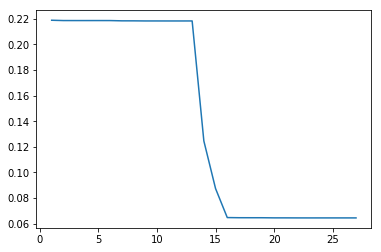

In [38]:
xAxisPlot = list(range(1, X_train.shape[1]+1))
plt.plot(xAxisPlot, cvError)

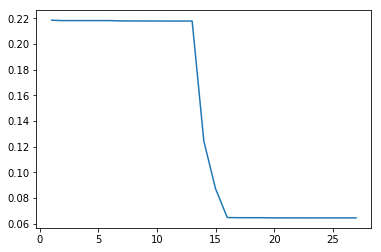

In [39]:
plt.plot(xAxisPlot, testError)

In [41]:
print(cvError[15])
print(testError[15])

0.0648116886335
0.0646644442569


## Model 2: Gradient Boosting Regressor

In [42]:
def applyPCASpecific(X_train, X_test, numComponents):
    pca = PCA(n_components = numComponents)

    # Fit the training data to the PCA model.
    pca.fit(X_train)

    # Reduce the dimensionality of the training set.
    newX_train = pca.transform(X_train)

    # Reduce the dimensionality of the testing set.
    newX_test = pca.transform(X_test)
    
    return newX_train, newX_test

pcaX_train, pcaX_test = applyPCASpecific(X_train, X_test, 16)
pcaX_train, pcaX_cv = applyPCASpecific(X_train, X_cv, 16)

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(pcaX_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [44]:
print("Training MSE: ", np.mean((clf.predict(pcaX_train) - y_train)**2))
print("Baseline training MSE: ", np.mean((np.mean(y_train) - y_train)**2))

Training MSE:  0.0166747462133
Baseline training MSE:  0.223299264109


In [45]:
print("CV MSE: ", np.mean((clf.predict(pcaX_cv) - y_cv)**2))
print("Baseline CV MSE: ", np.mean((np.mean(y_train) - y_cv)**2))

CV MSE:  0.0168515423449
Baseline CV MSE:  0.222950525042


In [46]:
print("Test MSE: ", np.mean((clf.predict(pcaX_test) - y_test)**2))
print("Baseline Test MSE: ", np.mean((np.mean(y_train) - y_test)**2))

Test MSE:  0.0167798157758
Baseline Test MSE:  0.22328588427


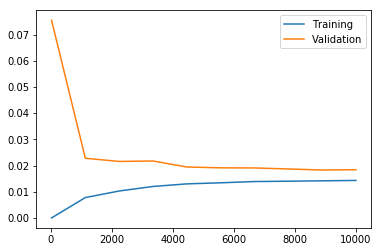

In [47]:
def get_err_samples(clf, X, y, X_cv, y_cv, n_samples):
    clf.fit(X[:n_samples], y[:n_samples])
    return np.array([np.mean((clf.predict(X[:n_samples]) - y[:n_samples])**2), 
                     np.mean((clf.predict(X_cv) - y_cv)**2)])

n_samples = [int(x) for x in np.linspace(20, 10000, 10)] # 1000, 2000, ..., 10000
errors = np.array([get_err_samples(clf, pcaX_train, y_train, pcaX_cv, y_cv, n) for n in n_samples])
plt.plot(n_samples, errors[:,0], n_samples, errors[:,1])
plt.legend(["Training", "Validation"])

## Use the following for final project

In [52]:
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor

# Apply PCA
def applyPCA(X_train, X_test, numComponents):
    
    # Initialize the PCA class and pass in the number of dimensions to which you want to reduce your data to.
    pca = PCA(n_components = numComponents)

    # Fit the training data to the PCA model.
    pca.fit(X_train)

    # Reduce the dimensionality of the training set.
    newX_train = pca.transform(X_train)

    # Reduce the dimensionality of the testing set.
    newX_test = pca.transform(X_test)
    
    return newX_train, newX_test

# Train the PCA and get the right number of 
def PCAWithLinearRegression(X_train, y_train, X_test, y_test):
    numCols = X_train.shape[1]
    errors = []
    print(numCols)
    for i in range(numCols):
        print(i+1)
        pcaX_train, pcaX_test = applyPCA(X_train, X_test, i+1)
        (model, y_pred, error) = train_linear_regression(pcaX_train, y_train, pcaX_test, y_test)
        errors.append(error)
    return errors

cvError = PCAWithLinearRegression(X_train, y_train, X_cv, y_cv)
testError = PCAWithLinearRegression(X_train, y_train, X_test, y_test)
print(cvError)
print(testError)


27
1
Mean squared error: 0.21881
2
Mean squared error: 0.21856
3
Mean squared error: 0.21856
4
Mean squared error: 0.21855
5
Mean squared error: 0.21856
6
Mean squared error: 0.21855
7
Mean squared error: 0.21835
8
Mean squared error: 0.21834
9
Mean squared error: 0.21826
10
Mean squared error: 0.21826
11
Mean squared error: 0.21825
12
Mean squared error: 0.21825
13
Mean squared error: 0.21826
14
Mean squared error: 0.12460
15
Mean squared error: 0.08745
16
Mean squared error: 0.06481
17
Mean squared error: 0.06470
18
Mean squared error: 0.06468
19
Mean squared error: 0.06468
20
Mean squared error: 0.06458
21
Mean squared error: 0.06458
22
Mean squared error: 0.06455
23
Mean squared error: 0.06454
24
Mean squared error: 0.06454
25
Mean squared error: 0.06454
26
Mean squared error: 0.06454
27
Mean squared error: 0.06454
27
1
Mean squared error: 0.21850
2
Mean squared error: 0.21822
3
Mean squared error: 0.21821
4
Mean squared error: 0.21822
5
Mean squared error: 0.21822
6
Mean squared e

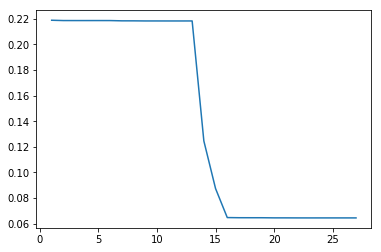

In [54]:
xAxisPlot = list(range(1, X_train.shape[1]+1))
plt.plot(xAxisPlot, cvError)

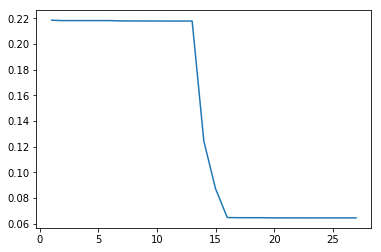

In [55]:
plt.plot(xAxisPlot, testError)

In [56]:
# Graphs above determine that 16 is the best number of components
def PCAwithGradientBoostingAndLR(X_train, X_test, y_train, numComponents):
    
    pcaX_train, pcaX_test = applyPCA(X_train, X_test, numComponents)
    clf = GradientBoostingRegressor()
    clf.fit(pcaX_train, y_train)
    modelResults = clf.predict(pcaX_test)
    
    return modelResults


# Pass in the new features created from the test data scraped instead of X_test
modelResults = PCAwithGradientBoostingAndLR(X_train, X_test, y_train, 16)

In [58]:
print(modelResults)

[ 3.18922776  2.10959702  1.90661003 ...,  3.39950835  2.0902702   2.2230426 ]


In [57]:
print("Test MSE: ", np.mean((modelResults - y_test)**2))
print("Baseline Test MSE: ", np.mean((np.mean(y_train) - y_test)**2))

Test MSE:  0.0167791970072
Baseline Test MSE:  0.22328588427
